In [274]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from tqdm.auto import tqdm

from scipy.integrate import odeint

# Fixed points

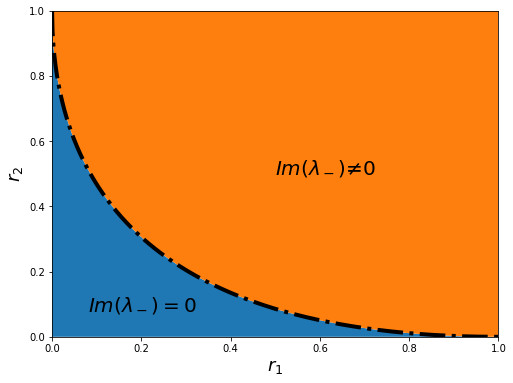

In [369]:
plt.figure(figsize=(8,6))

x = np.linspace(0,1,1000)
y = x - 2*np.sqrt(x) +1 

plt.plot(x, y, '-.', c='k', lw=4)

plt.fill_between(x,y)
plt.fill_between(x,y,np.ones(len(y)))

plt.text(0.08,0.08,r'$Im(\lambda_-)=0$', size=20)

plt.text(0.5,0.5,r'$Im(\lambda_-)\ne0$', size=20)

plt.xlabel(r'$r_1$', size=18)
plt.ylabel(r'$r_2$', size=18)

plt.xlim([0,1])
plt.ylim([0,1])

plt.show()

In [26]:
def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
    plt.xticks([]) # labels 
    plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 1.5 # axis line width
    ohg = 0.1 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg,
             length_includes_head= True, clip_on = False)

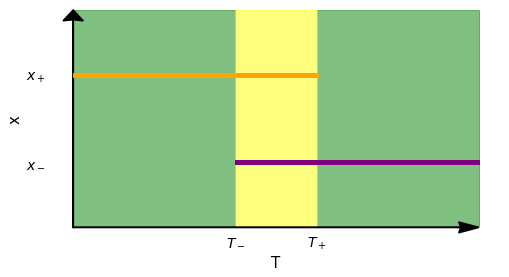

In [27]:
minor = 2/5
major = 3/5

fig = plt.figure(figsize=(8,4))

ax = plt.subplot(111)

arrowed_spines(fig, ax)

ax.set_xlabel('T', size=15)
ax.set_ylabel('x', size=15)

# T
#plt.axvline(x=minor, c='r', ls='-.', lw=5)
#plt.axvline(x=major, c='b', ls='-.', lw=5)

plt.xticks([minor, major], [r'$T_-$', r'$T_+$'], size=14)

# X
plt.axhline(y=0.7, xmin=0.05, xmax=major-0.01, c='orange', ls='-', lw=5)
plt.axhline(y=0.3, xmin=minor+0.013, xmax=1-0.05, c='purple', ls='-', lw=5)

plt.yticks([0.7, 0.3], [r'$x_+$', r'$x_-$'], size=14)

ax.axvspan(0, minor, alpha=0.5, color='g')
ax.axvspan(major, 1, alpha=0.5, color='g')

ax.axvspan(minor, major, alpha=0.5, color='yellow')

#ax.text(0.05, 0.4, '1 fixed point', size=13)
#ax.text(0.75, 0.4, '1 fixed point', size=13)
#ax.text(0.4, 0.6, '2 fixed points', size=13)

plt.show()

In [240]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the HTC in the thermodynamic limit.

    Arguments:
        w :  vector of the state variables:
                  w = [x,y]
        t :  time
        p :  vector of the parameters:
                  p = [r1,r2, T]
    """
    x, y = w
    r1, r2, T = p

    # Create f = (x',y'):
    f = [ ( 1-x-y ) * ( r1 + (1-r1)*np.heaviside(x-T, 0) ) - x,
         x-r2*y]
    return f

def solve_ode(p, N=50, stoptime=30.0):
    numpoints = int(stoptime*10)

    t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

    sol = []

    for _ in range(N):
        a, b = np.random.random(2)
        x0 = a*b
        y0 = b-x0
        w0 = [x0, y0]

        wsol = odeint(vectorfield, w0, t, args=(p,), atol=1e-8, rtol=1e-6)
        sol.append(wsol)
    return sol

def get_streamplot(p):
    r1, r2, T = p
    Y, X = np.mgrid[0:1:500j, 0:1:500j]
    U = (1-X-Y)*(r1 + (1-r1)*np.heaviside(X-T, 0)) - X
    V = X - r2*Y
    
    return [X,Y,U,V]

In [488]:
# Define params
r1 = 1e-1
r2 = 1e-1

yminus = r1 / (r1 + r2 + r1*r2)
xminus = r2 * yminus

yplus = 1 / (2*r2 +1)
xplus = r2 * yplus

Tminus = xminus
Tplus = xplus

print('T+:', Tplus)
print('T-:', Tminus)

print('x+:', xplus)
print('x-:', xminus)

T+: 0.08333333333333334
T-: 0.047619047619047616
x+: 0.08333333333333334
x-: 0.047619047619047616


In [242]:
Ts = [0.7*Tminus, Tminus + 0.5*(Tplus-Tminus), 1.5*Tplus]
titles = [r'$T<T_-$', r'$T_-<T<T_+$', r'$T>T_+$']

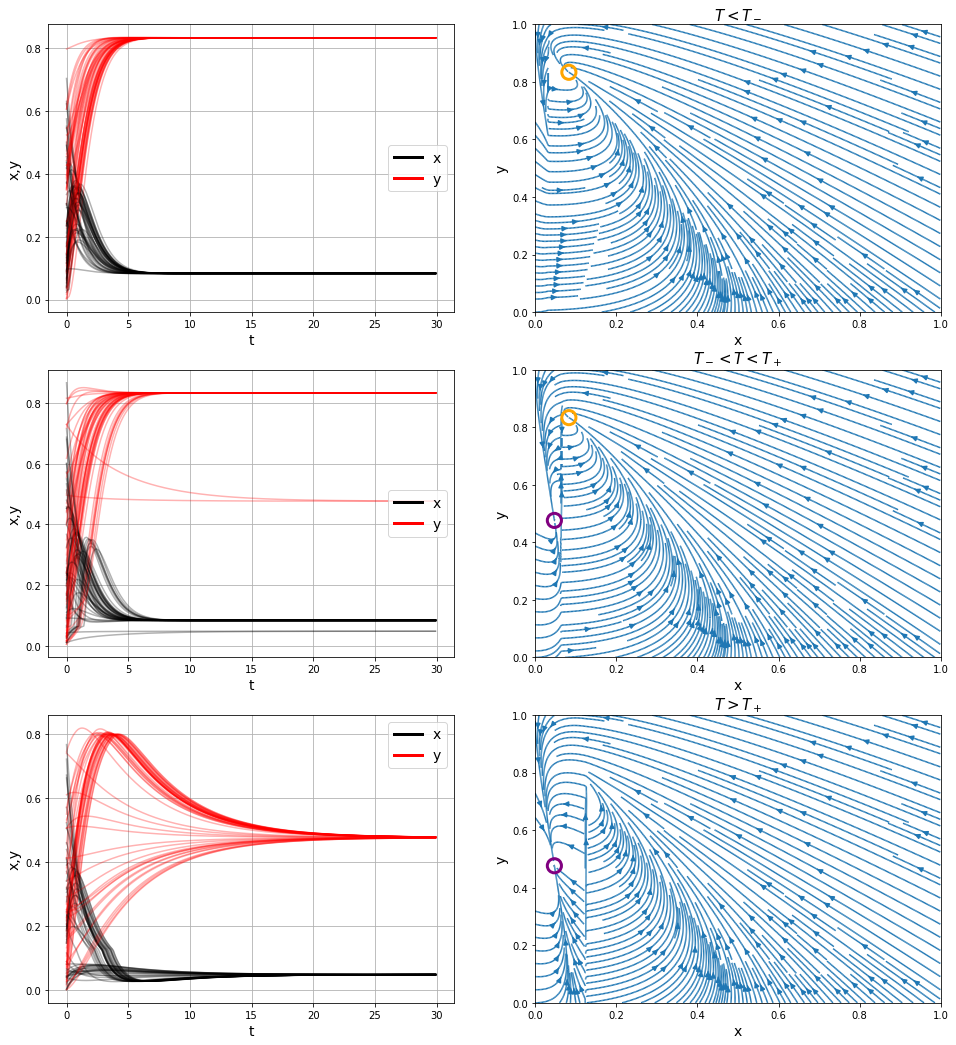

In [243]:
plt.figure(figsize=(16,18))

for j, T in enumerate(Ts):
    p = [r1, r2, T]

    ### GET SOLUTIONS

    # Solve ode
    sol = solve_ode(p)

    # Streamplot
    X, Y, U, V = get_streamplot(p)

    ### PLOT
    # Plot ode
    plt.subplot(len(Ts),2,2*j + 1)
    
    t = np.arange(len(sol[0][:,0])) / 10

    for i in range(len(sol)):
        plt.plot(t, sol[i][:,0], c='k', alpha=0.3)
        plt.plot(t, sol[i][:,1], c='r', alpha=0.3)

    plt.xlabel('t', size=14)
    plt.ylabel('x,y', size=14)
    plt.grid()
    
    colors = ['k', 'r']
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
    labels = ['x', 'y']
    plt.legend(lines, labels, fontsize=14)

    # Plot Streamplot
    plt.subplot(len(Ts),2,2*j + 2)
    plt.title(titles[j], size=15)

    plt.streamplot(X, Y, U, V, density=[10, 1.5])

    plt.xlabel('x', size=14)
    plt.ylabel('y', size=14)
    
    if j>0:
        plt.scatter(xminus, yminus, s=200, zorder=10, facecolors='none', edgecolors='purple', linewidth=3)
    if j<2:
        plt.scatter(xplus, yplus, s=200, zorder=10, facecolors='none', edgecolors='orange', linewidth=3)

    plt.xlim([0, 1])
    plt.ylim([0, 1])

plt.show()

In [258]:
# Define params
r1 = 1e-3
r2 = 1e-2

yminus = r1 / (r1 + r2 + r1*r2)
xminus = r2 * yminus

yplus = 1 / (2*r2 +1)
xplus = r2 * yplus

Tminus = xminus
Tplus = xplus

print('T+:', Tplus)
print('T-:', Tminus)

print('x+:', xplus)
print('x-:', xminus)

T+: 0.00980392156862745
T-: 0.0009082652134423252
x+: 0.00980392156862745
x-: 0.0009082652134423252


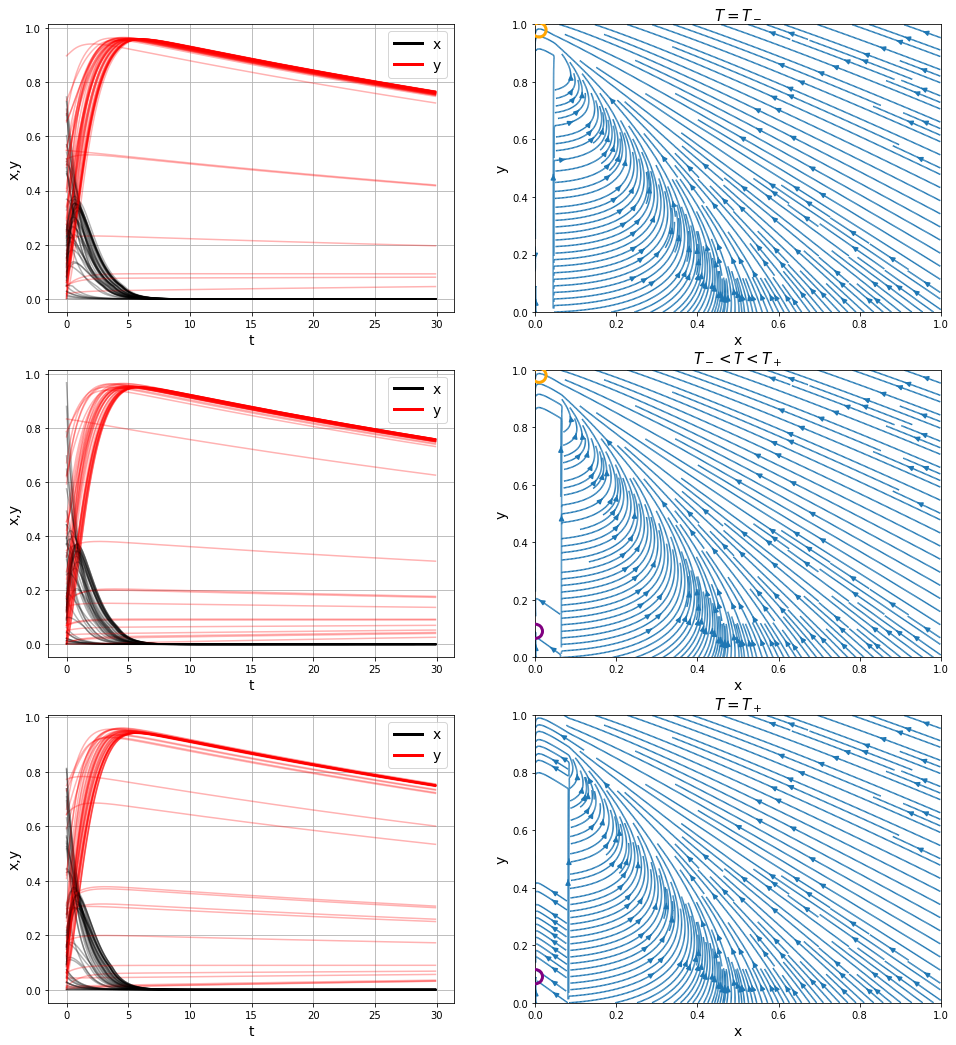

In [259]:
plt.figure(figsize=(16,18))

for j, T in enumerate(Ts):
    p = [r1, r2, T]

    ### GET SOLUTIONS

    # Solve ode
    sol = solve_ode(p)

    # Streamplot
    X, Y, U, V = get_streamplot(p)

    ### PLOT
    # Plot ode
    plt.subplot(len(Ts),2,2*j + 1)
    
    t = np.arange(len(sol[0][:,0])) / 10

    for i in range(len(sol)):
        plt.plot(t, sol[i][:,0], c='k', alpha=0.3)
        plt.plot(t, sol[i][:,1], c='r', alpha=0.3)

    plt.xlabel('t', size=14)
    plt.ylabel('x,y', size=14)
    plt.grid()
    
    colors = ['k', 'r']
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
    labels = ['x', 'y']
    plt.legend(lines, labels, fontsize=14)

    # Plot Streamplot
    plt.subplot(len(Ts),2,2*j + 2)
    plt.title(titles[j], size=15)

    plt.streamplot(X, Y, U, V, density=[10, 1.5])

    plt.xlabel('x', size=14)
    plt.ylabel('y', size=14)
    
    if j>0:
        plt.scatter(xminus, yminus, s=200, zorder=10, facecolors='none', edgecolors='purple', linewidth=3)
    if j<2:
        plt.scatter(xplus, yplus, s=200, zorder=10, facecolors='none', edgecolors='orange', linewidth=3)

    plt.xlim([0, 1])
    plt.ylim([0, 1])

plt.show()

# Mean field

In [4]:
from numba import jit, prange

parallel = False

In [246]:
@jit(nopython=True, parallel=parallel)
def init_state(N, runs):
    '''
    Initialize the state of the system
    fract: fraction of initial acrive neurons
    '''
    
    # create shuffled array
    states = np.zeros((runs,N))
    for i in prange(runs):
        a, b = np.random.random(2)
        x0 = a*b
        y0 = b-x0
        n_act = int(np.ceil(x0 * N))     # number of initial active neurons
        n_ref = int(np.ceil(y0 * N)) 
        
        # create vector with n_act 1's, the rest half 0's and half -1's
        states[i,:n_act] = 1.
        states[i,n_act:N-n_ref] = -1.
        
    return states 

@jit(nopython=True)
def update_state_single(S, T, r1, r2):
    '''
    Update state of the system according to HTC model
    Update causal avalanches state
    '''
    N = len(S)
    probs = np.random.random(N)                 # generate probabilities
    s = (S==1).astype(np.float64)               # get active nodes
    pA = ( r1 + (1.-r1) * ( np.sum(s)/(N-1)>T ) )    # prob. to become active

    # update state vector
    newS = ( (S==0)*(probs<pA)                  # I->A
         + (S==1)*-1                            # A->R
         + (S==-1)*(probs>r2)*-1 )              # R->I (remain R with prob 1-r2)

    return newS

@jit(nopython=True, parallel=parallel)
def update_state(S, T, r1, r2):
    '''
    Update state of each runs
    '''
    runs = S.shape[0]
    newS = np.zeros((S.shape[0], S.shape[1]), dtype=np.float64)
    
    # Simulation step in parallel
    for i in prange(runs):
        newS[i] = update_state_single(S[i], T, r1, r2)
        
    return (newS, (newS==1).astype(np.int64), (newS==-1).astype(np.int64))

In [247]:
runs = 50
N = int(1e4)
steps = 200

S = init_state(N, runs)

At = np.zeros((runs, steps))
Rt = np.zeros((runs, steps))

In [248]:
T = Tminus

# Loop over steps
for i in range(steps):
    S, s, r = update_state(S, T, r1, r2)
    At[:,i] = np.mean(s, axis=1)
    Rt[:,i] = np.mean(r, axis=1)

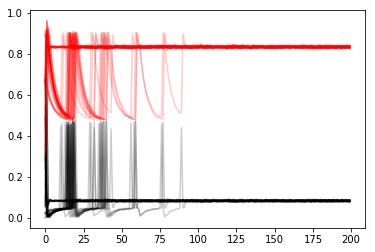

In [249]:
for i in range(runs):
    plt.plot(range(steps), At[i], alpha=0.2, c='k')
    plt.plot(range(steps), Rt[i], alpha=0.2, c='r')
plt.show()

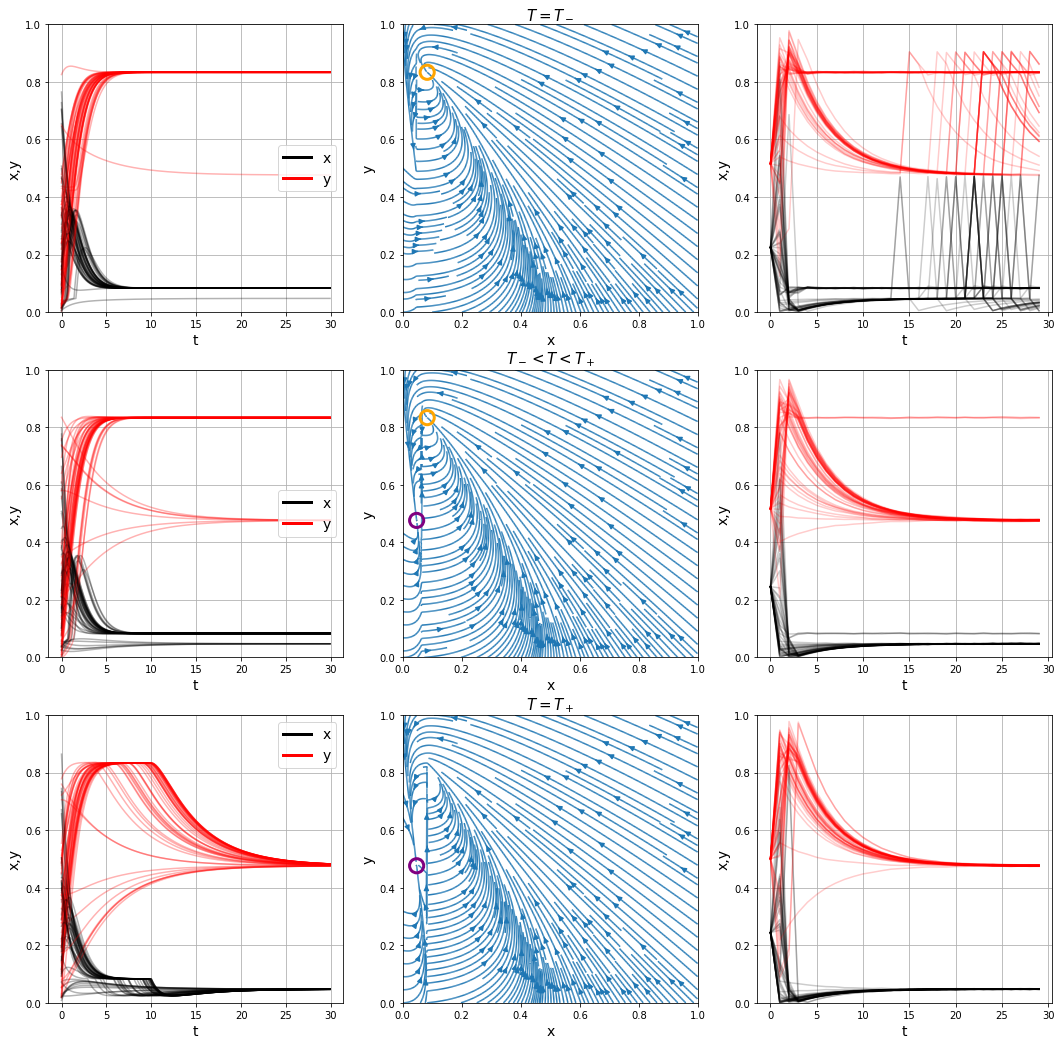

In [257]:
plt.figure(figsize=(18,18))

for j, T in enumerate(Ts):
    p = [r1, r2, T]

    ### GET SOLUTIONS

    # Solve ode
    sol = solve_ode(p)

    # Streamplot
    X, Y, U, V = get_streamplot(p)
    
    # Mean-field
    runs = 50
    N = int(1e5)
    steps = 30

    S = init_state(N, runs)
    At = np.zeros((runs, steps))
    Rt = np.zeros((runs, steps))
    
    At[:,0] = (S==1).mean()
    Rt[:,0] = (S==-1).mean()
    
    # Loop over steps
    for i in range(1,steps):
        S, s, r = update_state(S, T, r1, r2)
        At[:,i] = np.mean(s, axis=1)
        Rt[:,i] = np.mean(r, axis=1)

    ### PLOT
    # Plot ode
    plt.subplot(len(Ts),3,3*j + 1)
    
    t = np.arange(len(sol[0][:,0])) / 10

    for i in range(len(sol)):
        plt.plot(t, sol[i][:,0], c='k', alpha=0.3)
        plt.plot(t, sol[i][:,1], c='r', alpha=0.3)

    plt.xlabel('t', size=14)
    plt.ylabel('x,y', size=14)
    plt.grid()
    plt.ylim([0, 1])
    
    colors = ['k', 'r']
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
    labels = ['x', 'y']
    plt.legend(lines, labels, fontsize=14)

    # Plot Streamplot
    plt.subplot(len(Ts),3,3*j + 2)
    plt.title(titles[j], size=15)

    plt.streamplot(X, Y, U, V, density=[10, 1.5])

    plt.xlabel('x', size=14)
    plt.ylabel('y', size=14)
    
    if j>0:
        plt.scatter(xminus, yminus, s=200, zorder=10, facecolors='none', edgecolors='purple', linewidth=3)
    if j<2:
        plt.scatter(xplus, yplus, s=200, zorder=10, facecolors='none', edgecolors='orange', linewidth=3)

    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
    # Plot Mean-field
    plt.subplot(len(Ts),3,3*j + 3)
    
    for i in range(runs):
        plt.plot(range(steps), At[i], alpha=0.2, c='k')
        plt.plot(range(steps), Rt[i], alpha=0.2, c='r')
        
    plt.xlabel('t', size=14)
    plt.ylabel('x,y', size=14)
    plt.grid()
    plt.ylim([0, 1])

plt.show()

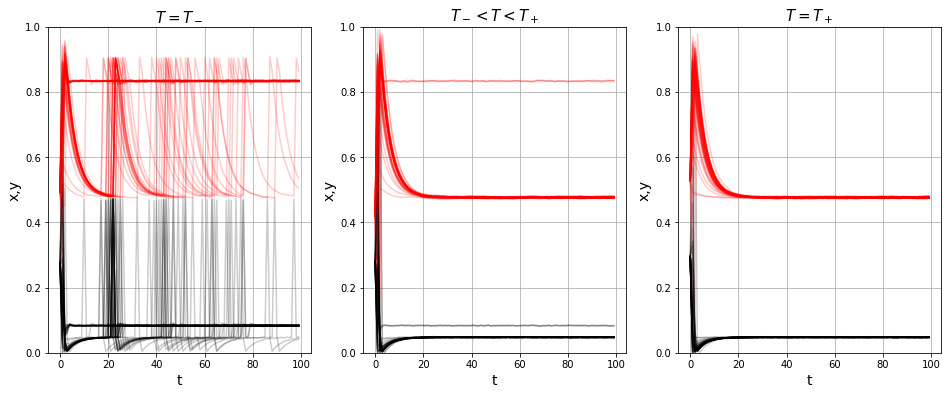

In [267]:
Ts = [Tminus, Tminus + 0.5*(Tplus-Tminus), Tplus]
titles = [r'$T=T_-$', r'$T_-<T<T_+$', r'$T=T_+$']

plt.figure(figsize=(16,6))

for j, T in enumerate(Ts):
    p = [r1, r2, T]

    # Mean-field
    runs = 50
    N = int(1e5)
    steps = 100

    S = init_state(N, runs)
    At = np.zeros((runs, steps))
    Rt = np.zeros((runs, steps))
    
    At[:,0] = (S==1).mean()
    Rt[:,0] = (S==-1).mean()
    
    # Loop over steps
    for i in range(1,steps):
        S, s, r = update_state(S, T, r1, r2)
        At[:,i] = np.mean(s, axis=1)
        Rt[:,i] = np.mean(r, axis=1)

    # Plot Mean-field
    plt.subplot(1,len(Ts),j+1)
    plt.title(titles[j], size=15)
    
    for i in range(runs):
        plt.plot(range(steps), At[i], alpha=0.2, c='k')
        plt.plot(range(steps), Rt[i], alpha=0.2, c='r')
        
    plt.xlabel('t', size=14)
    plt.ylabel('x,y', size=14)
    plt.grid()
    plt.ylim([0, 1])

plt.show()

In [308]:
points = 20

Ts = np.linspace(0, Tplus*1.5, points)

A, sigmaA = np.zeros(points), np.zeros(points)

runs = 50
N = int(5e3)
steps = int(1e3)

for j,T in enumerate(Ts):
    print('T: ', j+1, '/', len(Ts))
    S = init_state(N, runs)
    At = np.zeros((runs, steps))
    Rt = np.zeros((runs, steps))
    
    # Loop over steps
    for i in tqdm(range(steps)):
        S, s, r = update_state(S, T, r1, r2)
        At[:,i] = np.mean(s, axis=1)
        
    A[j] = np.mean(At)
    sigmaA[j] = np.mean(np.std(At, axis=1))

T:  1 / 20



T:  2 / 20



T:  3 / 20



T:  4 / 20



T:  5 / 20



T:  6 / 20



T:  7 / 20



T:  8 / 20



T:  9 / 20



T:  10 / 20



T:  11 / 20



T:  12 / 20



T:  13 / 20



T:  14 / 20



T:  15 / 20



T:  16 / 20



T:  17 / 20



T:  18 / 20



T:  19 / 20



T:  20 / 20


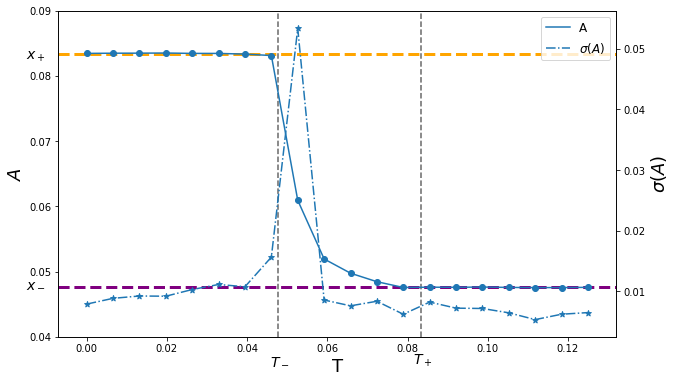

In [437]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(Ts, A, label='A', zorder=10)
ax1.scatter(Ts, A, zorder=20)

ax1.axvline(Tminus, c='k', ls='--', alpha=0.6)
ax1.axvline(Tplus, c='k', ls='--', alpha=0.6)

ax1.axhline(xminus, c='purple', ls='--', lw=3)
ax1.axhline(xplus, c='orange', ls='--', lw=3)

ax1.set_ylim([0.04, 0.09])

ax2 = ax1.twinx()

ax2.plot(Ts, sigmaA, '-.', label=r'$\sigma(A)$')
ax2.scatter(Ts, sigmaA, marker='*')

#ax2.set_ylim([0, 0.06])

#plt.yticks([xminus, xplus], [r'$x_+$', r'$x_-$'], size=14)

ax1.set_xlabel('T', size=18)
ax1.set_ylabel(r'$A$', size=18)
ax2.set_ylabel(r'$\sigma(A)$', size=18)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, fontsize=12)

plt.text(xminus-0.002,-0.002,r'$T_-$', size=14)
plt.text(xplus-0.002,-0.002,r'$T_+$', size=14)

plt.text(-0.015,xplus-0.035,r'$x_+$', size=14)
plt.text(-0.015,xminus-0.037,r'$x_-$', size=14)

plt.show()

In [479]:
points = 40

Ts = np.linspace(0.5*Tminus, Tplus*1.2, points)
Ns = [int(5e3), int(1e4), int(5e4), int(1e5)]

variousA, variousSigmaA = np.zeros((len(Ns), len(Ts))), np.zeros((len(Ns), len(Ts)))

runs = 50
steps = int(1e3)

for k,N in enumerate(Ns):
    print('------------ SIMULATING WITH N=',N, ' ------------')
    A, sigmaA = np.zeros(points), np.zeros(points)
    
    # Loop over Ts
    for j,T in enumerate(Ts):
        print('T: ', j+1, '/', len(Ts))
        S = init_state(N, runs)
        At = np.zeros((runs, steps))
        Rt = np.zeros((runs, steps))
    
        # Loop over steps
        for i in tqdm(range(steps)):
            S, s, r = update_state(S, T, r1, r2)
            At[:,i] = np.mean(s, axis=1)
        
        A[j] = np.mean(At)
        sigmaA[j] = np.mean(np.std(At, axis=1))
        
    variousA[k] = A
    variousSigmaA[k] = sigmaA

------------ SIMULATING WITH N= 5000  ------------
T:  1 / 30



T:  2 / 30



T:  3 / 30



T:  4 / 30



T:  5 / 30



T:  6 / 30



T:  7 / 30



T:  8 / 30



T:  9 / 30



T:  10 / 30



T:  11 / 30



T:  12 / 30



T:  13 / 30



T:  14 / 30



T:  15 / 30



T:  16 / 30



T:  17 / 30



T:  18 / 30



T:  19 / 30



T:  20 / 30



T:  21 / 30



T:  22 / 30



T:  23 / 30



T:  24 / 30



T:  25 / 30



T:  26 / 30



T:  27 / 30



T:  28 / 30



T:  29 / 30



T:  30 / 30



------------ SIMULATING WITH N= 10000  ------------
T:  1 / 30



T:  2 / 30



T:  3 / 30



T:  4 / 30



T:  5 / 30



T:  6 / 30



T:  7 / 30



T:  8 / 30



T:  9 / 30



T:  10 / 30



T:  11 / 30



T:  12 / 30



T:  13 / 30



T:  14 / 30



T:  15 / 30



T:  16 / 30



T:  17 / 30



T:  18 / 30



T:  19 / 30



T:  20 / 30



T:  21 / 30



T:  22 / 30



T:  23 / 30



T:  24 / 30



T:  25 / 30



T:  26 / 30



T:  27 / 30



T:  28 / 30



T:  29 / 30



T:  30 / 30



------------ SIMULATING WITH N= 50000  ------------
T:  1 / 30



T:  2 / 30



T:  3 / 30



T:  4 / 30



T:  5 / 30



T:  6 / 30



T:  7 / 30



T:  8 / 30



T:  9 / 30



T:  10 / 30



T:  11 / 30



T:  12 / 30



T:  13 / 30



T:  14 / 30



T:  15 / 30



T:  16 / 30



T:  17 / 30



T:  18 / 30



T:  19 / 30



T:  20 / 30



T:  21 / 30



T:  22 / 30



T:  23 / 30



T:  24 / 30



T:  25 / 30



T:  26 / 30



T:  27 / 30



T:  28 / 30



T:  29 / 30



T:  30 / 30



------------ SIMULATING WITH N= 100000  ------------
T:  1 / 30



T:  2 / 30



T:  3 / 30



T:  4 / 30



T:  5 / 30



T:  6 / 30



T:  7 / 30



T:  8 / 30



T:  9 / 30



T:  10 / 30



T:  11 / 30



T:  12 / 30



T:  13 / 30



T:  14 / 30



T:  15 / 30



T:  16 / 30



T:  17 / 30



T:  18 / 30



T:  19 / 30



T:  20 / 30



T:  21 / 30



T:  22 / 30



T:  23 / 30



T:  24 / 30



T:  25 / 30



T:  26 / 30



T:  27 / 30



T:  28 / 30



T:  29 / 30



T:  30 / 30


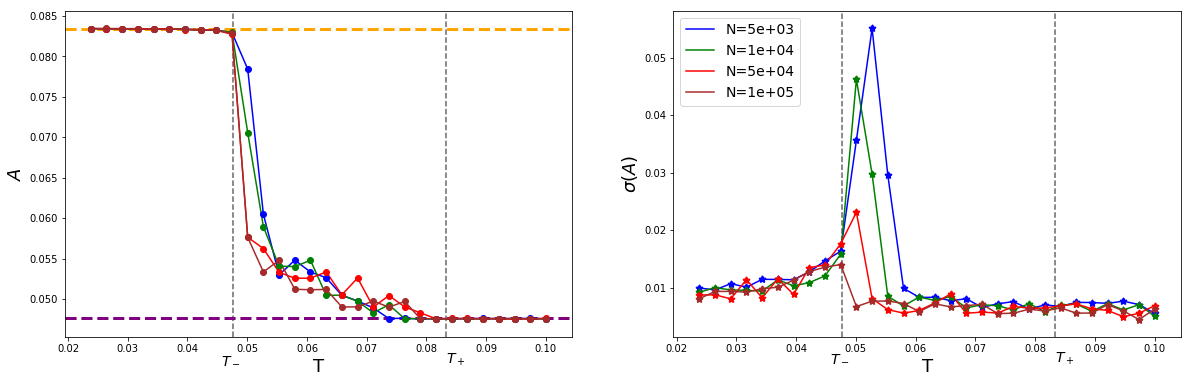

In [498]:
plt.figure(figsize=(20,6))

colors = ['blue', 'green', 'red', 'brown']

# ACTIVITY
plt.subplot(1,2,1)

for i,N in enumerate(Ns):
    plt.plot(Ts, variousA[i], label='N='+str("{:.0e}".format(N)), zorder=50, c=colors[i])
    plt.scatter(Ts, variousA[i], zorder=100, c=colors[i])

plt.xlabel('T', size=18)
plt.ylabel(r'$A$', size=18)

plt.axvline(Tminus, c='k', ls='--', alpha=0.6)
plt.axvline(Tplus, c='k', ls='--', alpha=0.6)

plt.axhline(xminus, c='purple', ls='--', lw=3)
plt.axhline(xplus, c='orange', ls='--', lw=3)

plt.text(xminus-0.002,0.042,r'$T_-$', size=14)
plt.text(xplus-0.00,0.042,r'$T_+$', size=14)

#plt.grid()
#plt.legend(fontsize=14)


# SIGMA
plt.subplot(1,2,2)

for i,N in enumerate(Ns):
    plt.plot(Ts, variousSigmaA[i], label='N='+str("{:.0e}".format(N)), zorder=50, c=colors[i])
    plt.scatter(Ts, variousSigmaA[i], zorder=100, marker='*', lw=2, c=colors[i])

plt.xlabel('T', size=18)
plt.ylabel(r'$\sigma(A)$', size=18)

plt.axvline(Tminus, c='k', ls='--', alpha=0.6)
plt.axvline(Tplus, c='k', ls='--', alpha=0.6)

plt.text(xminus-0.002,-0.003,r'$T_-$', size=14)
plt.text(xplus,-0.003,r'$T_+$', size=14)

#plt.grid()
plt.legend(fontsize=14)

plt.show()

In [487]:
#np.savetxt('mean_field_A.txt', variousA)
#np.savetxt('mean_field_sigmaA.txt', variousSigmaA)